
# K-means Algorithm

Hereafter we are going to observe and comment some example of clustering done using the K-means and soft K-means algorithm.
The algorithm has the pourpose of grouping a set of data points into K clusters, each of them is parametrized by a vector in same dimension of the data that represent the mean of the cluster.
Attached, in GIT repository there is also the code (main.py) that shows the K-means and the soft K-means behaviour step by step (libraries required: numpy, pyplot. Python version >= 3.4).

The K-means algo was performed on a dataset created via gaussian distributions. *k* clusters have been created with fixed variance, but with a number of points per cluster drawn randomly between two parameters.
The data are 2 dimensional, it is then possible to represent them in a plot.
The algorithm has been written in a more general way and it can be applied in the same way to more complex dataset. We will see later an approach to the MNIST dataset.

In [1]:
#%matplotlib inline
import lib
import itertools
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt

#import mpld3
#from mpld3 import plugins, utils

#mpld3.enable_notebook()

It can be proved that it always converge, even if the output depends strongly on the initial condition.
We first observe some plots, taken from a simulation done using *video.py*.

## A first example
We have used:
* number of clusters: K=3
* variance of the gaussians: $\sigma=0.3$

And the number of points per cluster has been drawn within the interval [20,70].

**All the points belonging to the same gaussian are represented with the same color, while all the points belonging to the same mean are represented with the same shape**.
Hereafter a case in which the algorithm converg at the right result and one in which the algorithm converg without identifying correctly all the point are presented. For each case all the iterations are plotted.

### A case of success
<tr>
    <td> <img src="images/eg1/1.png" alt="Drawing" style="width: 600px;"/> </td>
    <td> <img src="images/eg1/2.png" alt="Drawing" style="width: 600px;"/> </td>
    <td> <img src="images/eg1/3.png" alt="Drawing" style="width: 600px;"/> </td>
    <td> <img src="images/eg1/4.png" alt="Drawing" style="width: 600px;"/> </td>
</tr>
As one can seeall the point are well clusterized.

### A case of failure
<tr>
    <td> <img src="images/eg2/1.png" alt="Drawing" style="width: 600px;"/> </td>
    <td> <img src="images/eg2/2.png" alt="Drawing" style="width: 600px;"/> </td>
    <td> <img src="images/eg2/3.png" alt="Drawing" style="width: 600px;"/> </td>
</tr>
As one can see the main of the triangle up cluster starts too far from the data and fails in recognize correctly a cluster.


## Some other examples

In this section other two example are represented:
The first one show how the algorithm is not precise in presence of data generated from overlapped 2D gaussian distributions. Here each clusters has been generated with a large number of points.

* number of clusters: K=6
* variance of the gaussians: $\sigma=0.2$
* number of points per cluster drawn within the interval [350,500].

<img src="./images/hard_k6_sigma_02_beta15.png" width="600" height="600" />

From now on we compare some the result on the same data set with K-means and soft K-means.
The data set has been generated with well distinct gaussian with a different number of data in each clusters.

* number of clusters: K=6
* variance of the gaussians: $\sigma=0.1$
* number of points per cluster: [50,200,175,300,20,5].

<img src="./images/QUESTA.png" width="600" height="600" />

As one can notice and as we have already said the initial positions of the means are of foundament importance for the algo in order to converge at the right result.
Here has been plotted a simulation in which the performance hasn't be perfect.

## Soft K-means

The following plot represent the results obtained with soft K-means with different temperature.
For high temperature soft K-means tends to K-means. The means that start too close each others tend to the same point.
In fact being $\beta$ small, the correlation distance of the interactions of the data point with the mean is big and close means fell the same contributions from the neighborhood, expecially when the data are generated with a variance $\sigma$ smaller than $\frac{1}{\beta}$ as in this case.


* number of clusters: K=6
* $\beta=3$
* variance of the gaussians: $\sigma=0.1$
* number of points per cluster: [50,200,175,300,20,5].

<img src="./images/beta3.png" width="600" height="600" />

The result is in general better after a tuning of the parameter $\beta$.

* number of clusters: K=6
* $\beta=10$
* variance of the gaussians: $\sigma=0.1$
* number of points per cluster: [50,200,175,300,20,5].

<img src="./images/beta10.png" width="600" height="600" />

In the following plot a last example of soft K-means is represented.
Here, even if the clusters are slightly overlapped K-means reach a good extimate of the means.
It worth noting that the green and the light blue cluster having a different amount of points bias the correct means of those two clusters.

* number of clusters: K=6
* $\beta=5.5$
* variance of the gaussians: $\sigma=0.3$
* number of points per cluster drawn within the interval [50,200].

<img src="./images/hard_k6_sigma_03_beta55.png" width="600" height="600" />


# The MNIST Database



Hereafter the k-mnist algorithm has been applied to the MNIST dataset.
In order to better obtain a clastering of the database I have chosen the initial position of the means with a pretraining, that has been necessary since the k-means algorithm is strongly dependent on the starting points of the means.
First the MNIST dataset has been extracted and normalized.

In [2]:
from collections import defaultdict
from mnist import MNIST
mnstdata = MNIST("./python-mnist/data/")
mnstdata.load_training()
mnstdata.load_testing()

dtype  = [("imgs", "int"), ("lbls", "int")]
values = list(enumerate(mnstdata.train_labels))

b = np.array(values, dtype=dtype)
b = np.sort(b, order="lbls")


b_imgs, b_lbls = [*(zip(*b))]

pos = np.searchsorted(b_lbls, range(10))
pos = np.append(pos, len(b_lbls))

train_imgs = [np.divide(x,np.linalg.norm(x)) for x in mnstdata.train_images]
train_imgs = np.array(train_imgs)
#train_imgs = [x for x in mnstdata.train_images]
#train_imgs = np.array(train_imgs)
imgs = [train_imgs[list(b_imgs[pos[i]:pos[i+1]])] for i in range(10)]

del mnstdata

It has been reorganized, in such a way to do the mean of each element in the 784-dimensional space, of the set of each digit. Those means will be the starting points of the K-means algorithm. An Euclidean mean has been chosen.

In [3]:
means_fro = []
means_euc = []
for i in range(10):
    norms = [np.linalg.norm(x.reshape(28,28),ord="fro") for x in imgs[i]]
    means_fro.append((np.mean(norms), np.sqrt(np.var(norms))))

    norms = [np.linalg.norm(x) for x in imgs[i]]
    means_euc.append((np.mean(norms), np.sqrt(np.var(norms))))

means = [np.mean(np.array([*zip(*imgs[i])]),1) for i in range(10)]
means = np.array(means)

In [4]:
from hashlib import sha1
class hashable(object):
    r'''Hashable wrapper for ndarray objects.

        Instances of ndarray are not hashable, meaning they cannot be added to
        sets, nor used as keys in dictionaries. This is by design - ndarray
        objects are mutable, and therefore cannot reliably implement the
        __hash__() method.

        The hashable class allows a way around this limitation. It implements
        the required methods for hashable objects in terms of an encapsulated
        ndarray object. This can be either a copied instance (which is safer)
        or the original object (which requires the user to be careful enough
        not to modify it).
    '''
    def __init__(self, wrapped, tight=False):
        r'''Creates a new hashable object encapsulating an ndarray.

            wrapped
                The wrapped ndarray.

            tight
                Optional. If True, a copy of the input ndaray is created.
                Defaults to False.
        '''
        self.__tight = tight
        self.__wrapped = array(wrapped) if tight else wrapped
        self.__hash = int(sha1(wrapped.view(np.uint8)).hexdigest(), 16)

    def __eq__(self, other):
        return np.all(self.__wrapped == other.__wrapped)

    def __hash__(self):
        return self.__hash

    def unwrap(self):
        r'''Returns the encapsulated ndarray.
        
            If the wrapper is "tight", a copy of the encapsulated ndarray is
            returned. Otherwise, the encapsulated ndarray itself is returned.
        '''
        if self.__tight:
            return np.array(self.__wrapped)

        return self.__wrapped

In [5]:
dic = defaultdict(set)
for n in range(10):
    [dic[n].add(hashable(i)) for i in imgs[n]]

In [6]:
means, resp_matrix = lib.soft_k_means(k=10, beta=10., N=784, data=train_imgs, means=means)

/home/matteo/Documents/Master PCS/IV semester/Inference/clustering/lib.py:65: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if means==None:


In [7]:
means, resp_dict = lib.k_means(k=10, N=784, data=train_imgs, means=means)

/home/matteo/Documents/Master PCS/IV semester/Inference/clustering/lib.py:31: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if means==None:


Here are shown the results of the application of:

* soft K-means algorithm
* K-means algorithm

The soft K-means algorithm has been used has pretraining for the K-means algorithm.
The result is the following:

## Mean Digit Clusters - K=10

### 0 - cluster

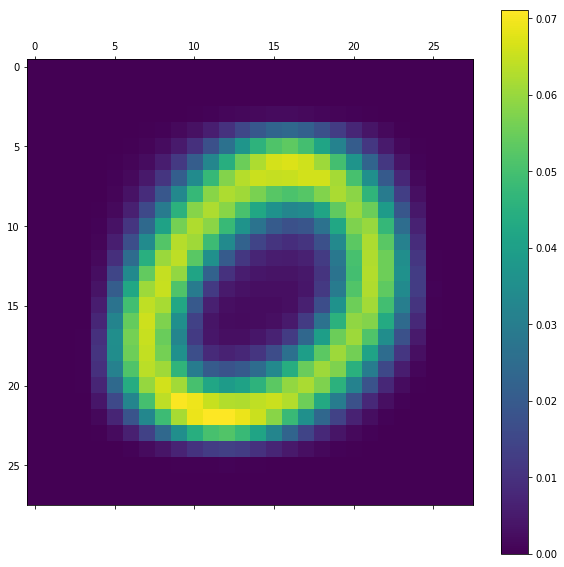

In [8]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[0])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)

plt.show()

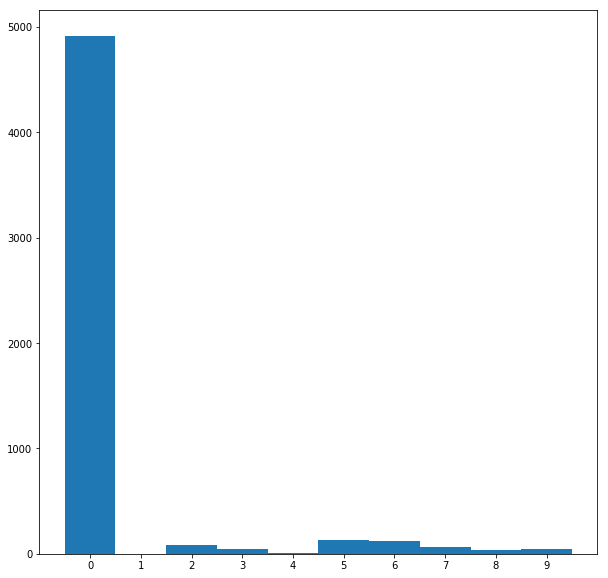

In [9]:
digit = 0
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 1-cluster

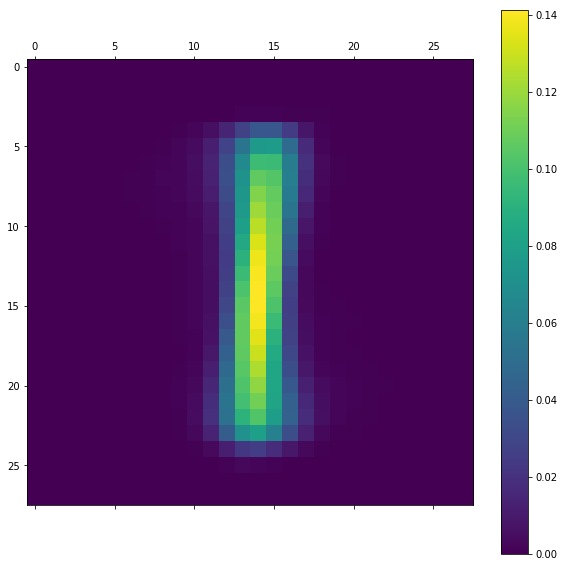

In [10]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[1])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

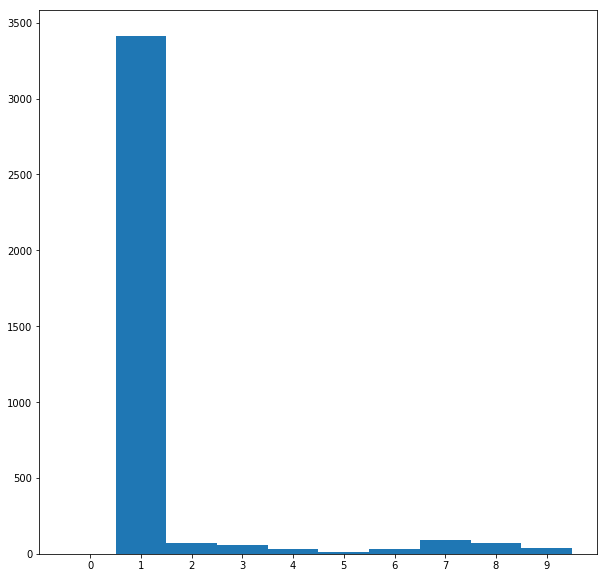

In [11]:
digit = 1
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 2-cluster

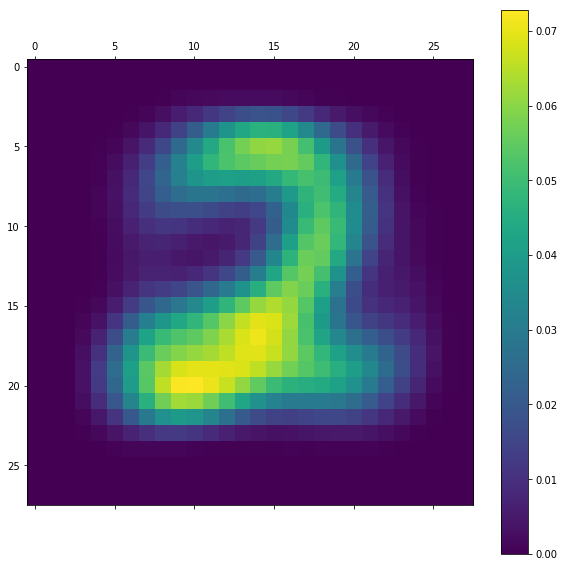

In [12]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[2])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

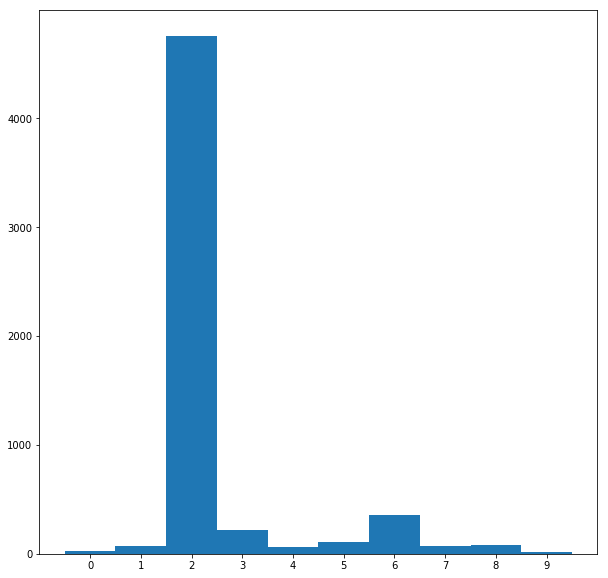

In [13]:
digit = 2
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 3-cluster

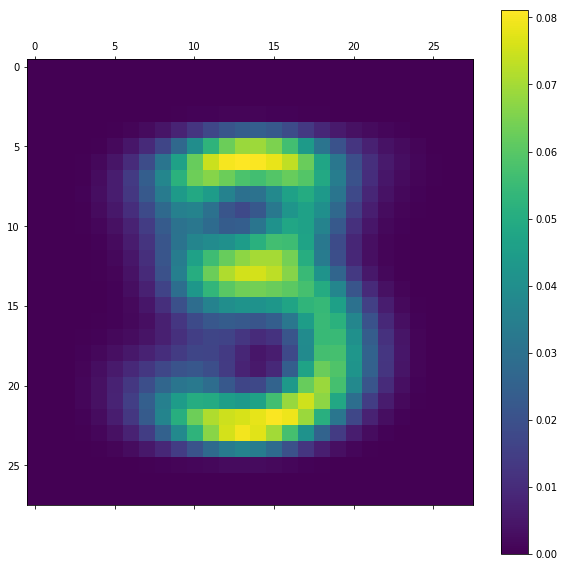

In [14]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[3])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

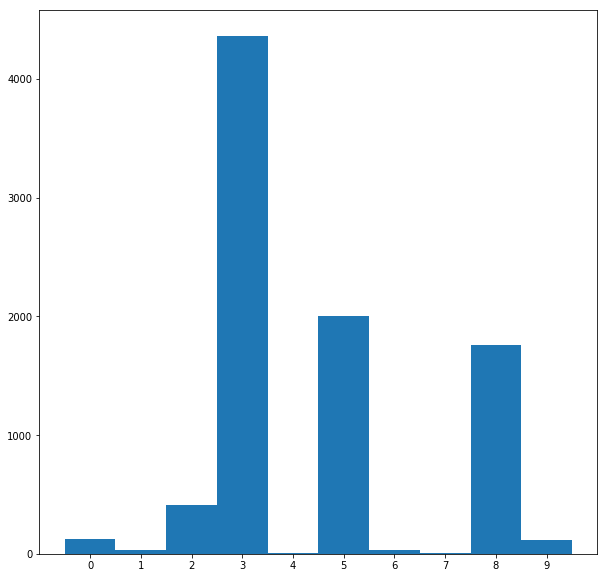

In [15]:
digit = 3
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 4-cluster

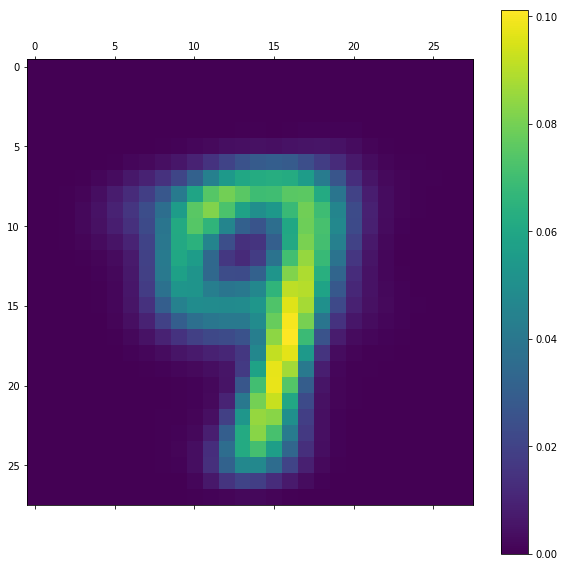

In [16]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[4])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

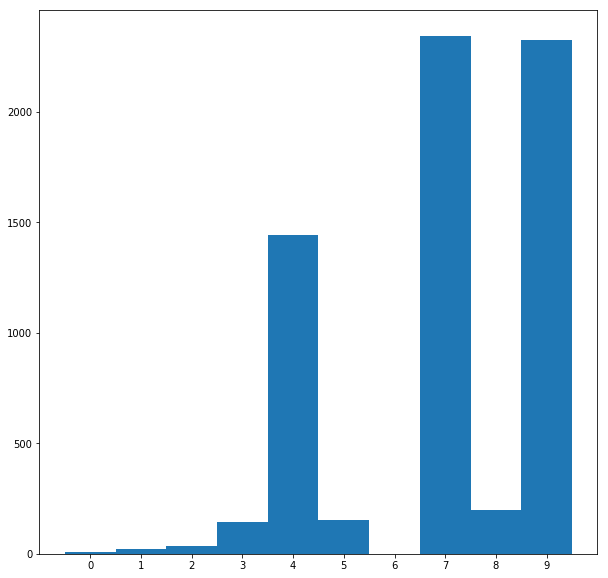

In [17]:
digit = 4
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 5-cluster

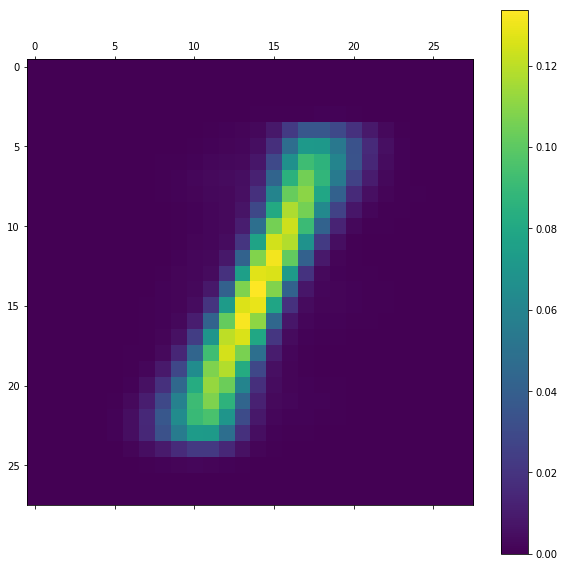

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[5])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

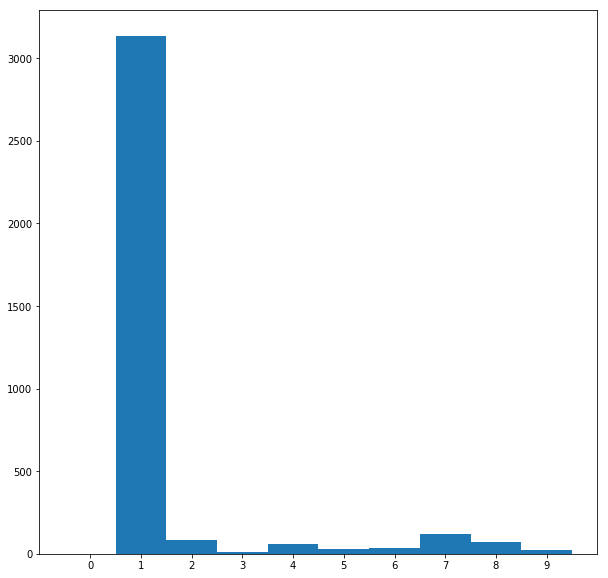

In [19]:
digit = 5
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 6-cluster

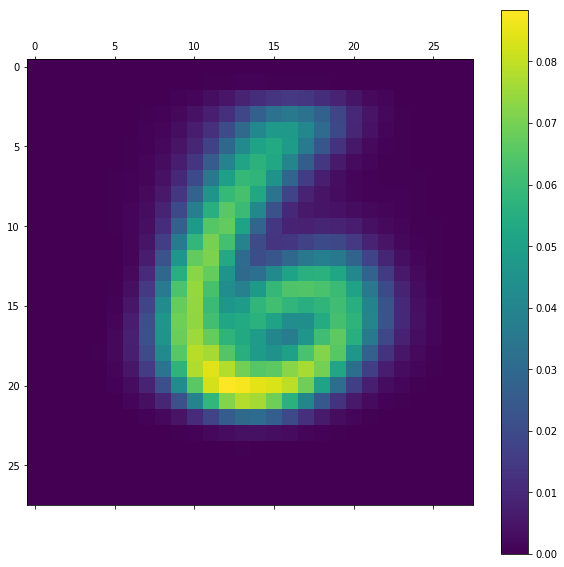

In [20]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[6])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

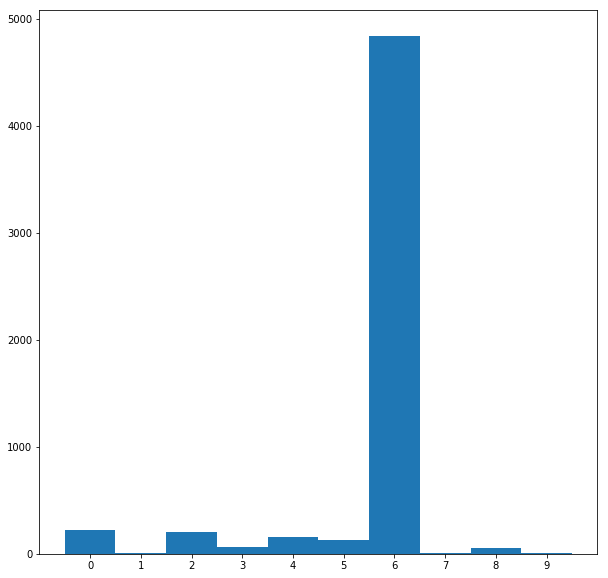

In [21]:
digit = 6
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 7-cluster

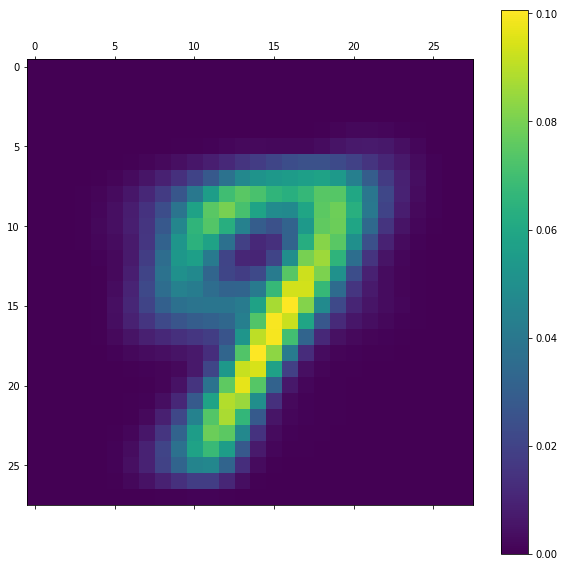

In [22]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[7])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

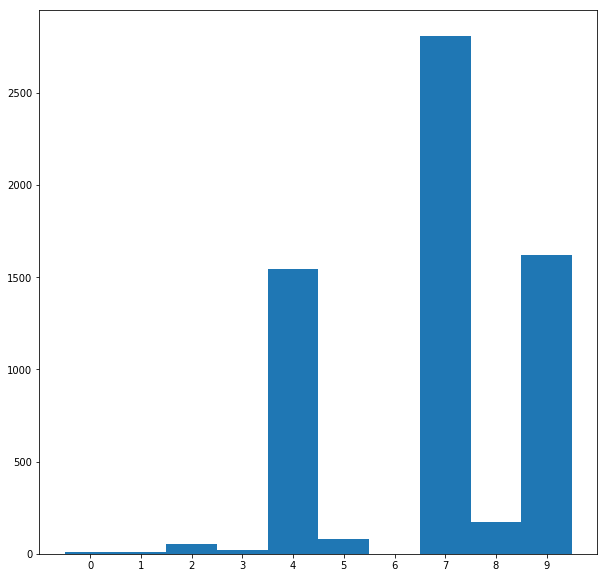

In [23]:
digit = 7
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 8-cluster

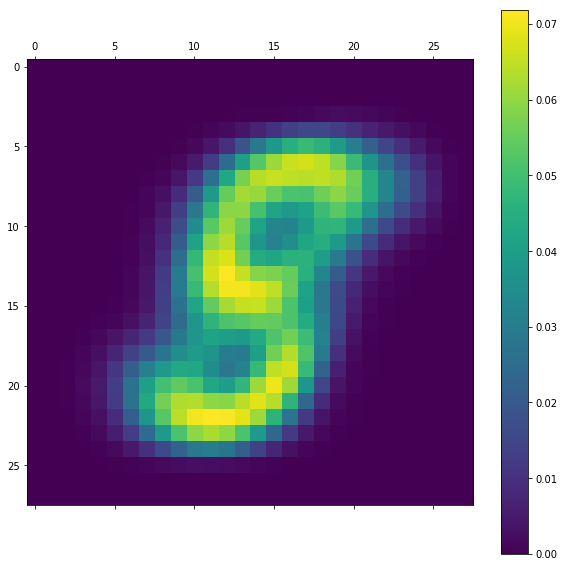

In [24]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[8])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

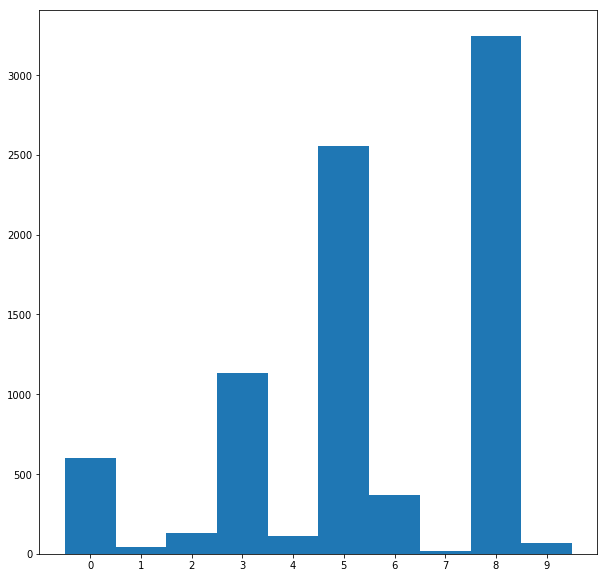

In [25]:
digit = 8
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()

### 9-cluster

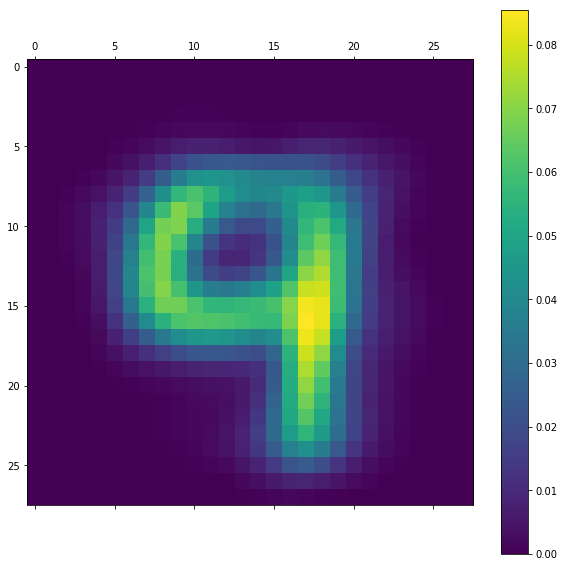

In [26]:
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
qwe = np.copy(means[9])
cax = ax.matshow(qwe.reshape(28,28)) 
fig.colorbar(cax)
plt.show()

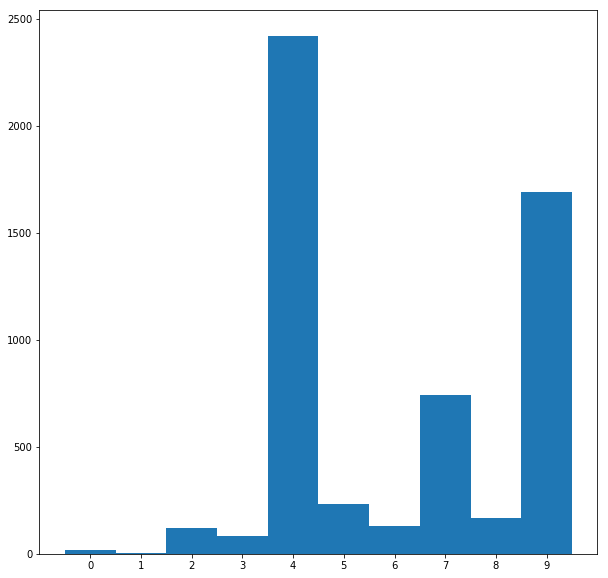

In [27]:
digit = 9
count = np.zeros(10)
for i in resp_dict[digit]:
    for j in range(10):
        if hashable(i) in dic[j]:
            count[j] += 1
            break
fig = plt.figure(figsize=(10,10))
ax  = plt.subplot(111)
plt.hist(np.arange(0,10,1), bins=np.arange(0,11,1),
          range=None, normed=False, weights=count,
          cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical',
          rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None)
ax.set_xticks(0.5 + np.arange(0,10,1))
ax.set_xticklabels(np.arange(0,10,1))
plt.show()